### SVM(Support Vector Machine)

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
%cd /content/drive/MyDrive/multi/0425

/content/drive/MyDrive/multi/0425


In [3]:
import pandas as pd

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df.shape)
df.head(3)

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


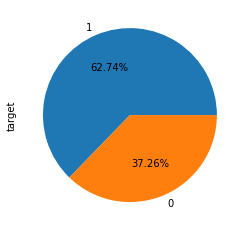

In [9]:
df.target.value_counts().plot.pie(autopct='%.2f%%')

- 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

cancer_std = StandardScaler().fit_transform(cancer.data)
df = pd.DataFrame(cancer_std, columns=cancer.feature_names)
df['target'] = cancer.target

df.describe()

- 표준화된 데이터로 train/test dataset 분리

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=.2, random_state=2022
)

- SVM 모델 생성, 학습 및 평가

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=2022)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9912280701754386

In [13]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 2022,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Toy MNIST data

In [16]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
digits.images.shape

(1797, 8, 8)

In [18]:
digits.data.min(), digits.data.max()

(0.0, 16.0)

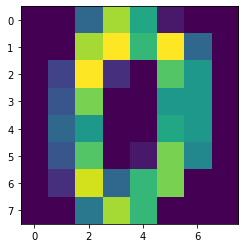

In [19]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0])
plt.show()

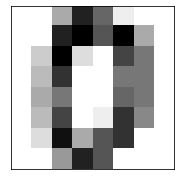

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()

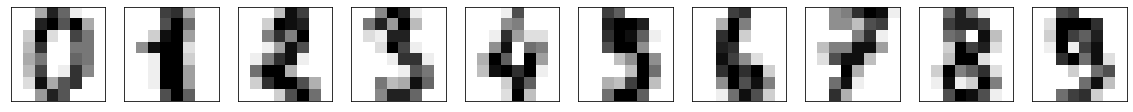

In [30]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
plt.show()

- train/test dataset 분리

In [34]:
max_num = digits.data.max()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data / max_num, digits.target, 
    stratify=digits.target, test_size=0.2,
    random_state=2022
)

- SVM 모델 생성, 학습 및 평가

In [50]:
params = {
    'C':[0.01, 0.1, 1, 10, 100]
}

In [57]:
def hyper_param(model, params): 
    grid_sv = GridSearchCV(model, params, scoring='accuracy', cv=5)
    grid_sv.fit(X_train, y_train)

    return grid_sv

In [51]:
svc = SVC(random_state=2022)

grid_sv = hyper_param(svc, params)
grid_sv.best_params_

{'C': 10}

In [52]:
params = {
    'C':[2, 6, 10, 20, 50]
}

In [53]:
svc = SVC(random_state=2022)

grid_sv = hyper_param(svc, params)
grid_sv.best_params_

{'C': 10}

In [54]:
params = {
    'C':[3, 5, 9, 10, 15]
}

In [55]:
svc = SVC(random_state=2022)

grid_sv = hyper_param(svc, params)
grid_sv.best_params_

{'C': 9}

In [56]:
best_sv = grid_sv.best_estimator_
best_sv.score(X_test, y_test)

0.9833333333333333

In [60]:
svc = SVC(C=1, random_state=2022)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9805555555555555